# get packages

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
%matplotlib ipympl


from setup_data import setup_as_data, setup_an_data
from utils import time_period, plot_dfs

# Get Data

In [35]:
Austevoll_Sor_file_path = "row_data\\Austevoll_Sor\\Austevoll_data_instrument.feather"
print(Austevoll_Sor_file_path)
Austevoll_Sor_df = pd.read_feather(Austevoll_Sor_file_path)
Austevoll_Sor_df.set_index('Time', inplace=True)
len(Austevoll_Sor_df)

row_data\Austevoll_Sor\Austevoll_data_instrument.feather


22393

In [51]:
r_h=24
as_list_segments = [3, 4, 5, 6, 7, 8, 9]
Austevoll_Sor_df_segments = setup_as_data(Austevoll_Sor_df, smooth_sigma=18, list_segments=as_list_segments, r_h=r_h)

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.1552, b=15.9170, d=66.51, s=0.001000


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.1595, b=17.1581, d=60.67, s=0.001000


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=11.5614, b=16.9510, d=78.14, s=0.001000


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.2295, b=16.0725, d=59.88, s=0.001000


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.1447, b=18.2732, d=80.25, s=0.001000


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


✅ Fitted params: a=12.1479, b=15.9571, d=71.39, s=0.001000
✅ Fitted params: a=12.5281, b=18.9157, d=83.71, s=0.001000


In [52]:
Austevoll_Sor_df_segments[6].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'System_Parameters.Input_Voltage', 'Battery_Level_Fitted',
       'Battery_Level_Derivative', 'Voltage_Lag1', 'Voltage_Lead1',
       'Voltage_Diff', 'Voltage_Change_Rate', 'Rolling_Mean_Voltage',
       'Rolling_Max_Voltage', 'Rolling_Std_Voltage'],
      dtype='object')

## smoothing

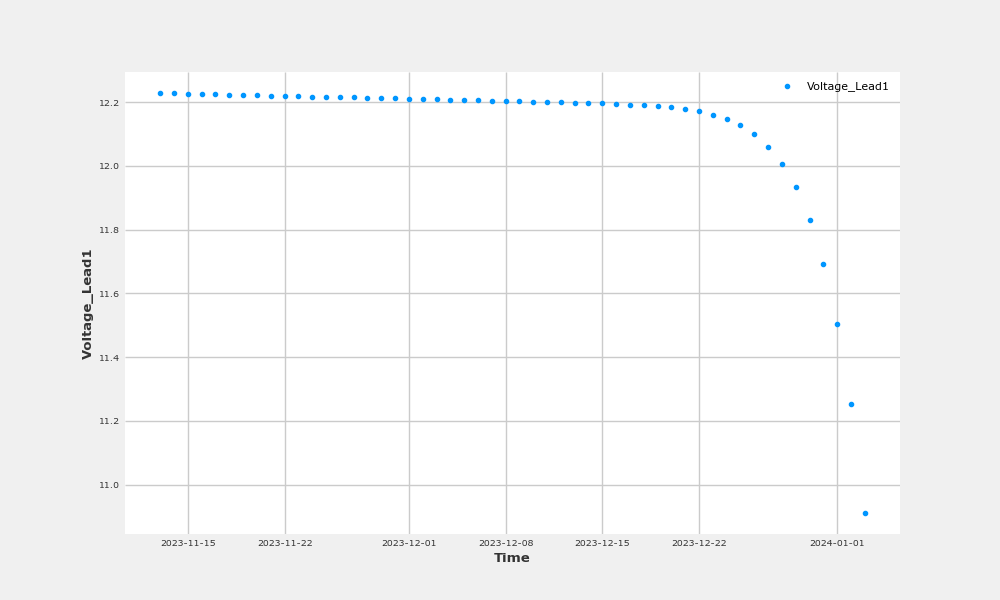

In [53]:
vol_df = Austevoll_Sor_df_segments[6].copy()[[ 'Voltage_Lead1',]][:]

plot_dfs([vol_df])

In [54]:
'''import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate corresponding x values (time/index)
x_data = np.arange(len(vol_series_numpy_arr))
y_data = vol_series_numpy_arr

# Define the model
def battery_model(x, a, b, d, s):
    return (1 - (x / d)**b) * a - s * x


param_bounds = (
    [0, 0.1, len(x_data) / 2, 0], 
    [100, 50, len(x_data) * 2, 0.005],
    )

# Fit the model to the data with reasonable bounds
popt, _ = curve_fit(
    battery_model, x_data, y_data,
    bounds=param_bounds,
)
fitted_a, fitted_b, fitted_d, fitted_s = popt

# Compute the fitted curve and its derivative
x_fine = np.linspace(min(x_data), max(x_data), 500)
y_fitted = battery_model(x_fine, *popt)
dy_dx = np.gradient(y_fitted, x_fine)

# Output the fitted parameters
fitted_a, fitted_b, fitted_d, fitted_s
'''

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.optimize import curve_fit\n\n# Generate corresponding x values (time/index)\nx_data = np.arange(len(vol_series_numpy_arr))\ny_data = vol_series_numpy_arr\n\n# Define the model\ndef battery_model(x, a, b, d, s):\n    return (1 - (x / d)**b) * a - s * x\n\n\nparam_bounds = (\n    [0, 0.1, len(x_data) / 2, 0], \n    [100, 50, len(x_data) * 2, 0.005],\n    )\n\n# Fit the model to the data with reasonable bounds\npopt, _ = curve_fit(\n    battery_model, x_data, y_data,\n    bounds=param_bounds,\n)\nfitted_a, fitted_b, fitted_d, fitted_s = popt\n\n# Compute the fitted curve and its derivative\nx_fine = np.linspace(min(x_data), max(x_data), 500)\ny_fitted = battery_model(x_fine, *popt)\ndy_dx = np.gradient(y_fitted, x_fine)\n\n# Output the fitted parameters\nfitted_a, fitted_b, fitted_d, fitted_s\n'

In [55]:
'''y_model_full = battery_model(x_data, *popt)
y_model_full_df = pd.DataFrame(y_model_full, columns=['Battery_Level_Fitted'])

print(len(y_model_full), len(y_data), len(x_data))

orig_smooth_Plots = [vol_df_ri[['System_Parameters.Input_Voltage']], y_model_full_df]
plot_dfs(orig_smooth_Plots)'''

"y_model_full = battery_model(x_data, *popt)\ny_model_full_df = pd.DataFrame(y_model_full, columns=['Battery_Level_Fitted'])\n\nprint(len(y_model_full), len(y_data), len(x_data))\n\norig_smooth_Plots = [vol_df_ri[['System_Parameters.Input_Voltage']], y_model_full_df]\nplot_dfs(orig_smooth_Plots)"

## fun

In [56]:
'''from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define your model function
def battery_model(x, a, b, d, s):
    return (1 - (x / d)**b) * a - s * x

# Loop through the dict
for segment_id, df in Austevoll_Sor_df_segments.items():
    print(f"Processing segment {segment_id}...")

    # Extract the series and convert to numpy
    numoy_array = df[ 'System_Parameters.Input_Voltage'].to_numpy()
    x_data = np.arange(len(numoy_array))
    y_data = numoy_array

    # Set bounds
    param_bounds = (
    [1, 0.1, len(x_data) / 2, 0], 
    [20, 60, len(x_data) * 2, 0.001],
    )

    try:
        # Fit the model
        popt, _ = curve_fit(battery_model, x_data, y_data, bounds=param_bounds)
        fitted_a, fitted_b, fitted_d, fitted_s = popt
        
        print(f"Fitted parameters for segment {segment_id}: a={fitted_a}, b={fitted_b}, d={fitted_d}, s={fitted_s}")
        # Evaluate model on full x
        y_model = battery_model(x_data, *popt)

        # Plot
        plt.figure(figsize=(8, 4))
        plt.plot(x_data, y_data, '.', label='Actual Data')
        plt.plot(x_data, y_model, label='Fitted Model', color='red', marker='.', linestyle='None')
        plt.title(f'Battery Depletion - Segment {segment_id}')
        plt.xlabel('Time')
        plt.ylabel('Battery Level')
        plt.legend()
        plt.grid()
        plt.show()

    except RuntimeError:
        print(f"⚠️ Fit failed for segment {segment_id}")
'''

'from scipy.optimize import curve_fit\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Define your model function\ndef battery_model(x, a, b, d, s):\n    return (1 - (x / d)**b) * a - s * x\n\n# Loop through the dict\nfor segment_id, df in Austevoll_Sor_df_segments.items():\n    print(f"Processing segment {segment_id}...")\n\n    # Extract the series and convert to numpy\n    numoy_array = df[ \'System_Parameters.Input_Voltage\'].to_numpy()\n    x_data = np.arange(len(numoy_array))\n    y_data = numoy_array\n\n    # Set bounds\n    param_bounds = (\n    [1, 0.1, len(x_data) / 2, 0], \n    [20, 60, len(x_data) * 2, 0.001],\n    )\n\n    try:\n        # Fit the model\n        popt, _ = curve_fit(battery_model, x_data, y_data, bounds=param_bounds)\n        fitted_a, fitted_b, fitted_d, fitted_s = popt\n\n        print(f"Fitted parameters for segment {segment_id}: a={fitted_a}, b={fitted_b}, d={fitted_d}, s={fitted_s}")\n        # Evaluate model on full x\n        y_model = batter

## my own implementation

In [57]:
def battery_model(x, a, b, d, s):
    return (1 - (x / d)**b) * a - s * x


In [58]:
def battery_model_derivative(x, a, b, d, s):
    return -a * b * (x / d)**(b - 1) / d - s

Processing segment 3 with custom solver...
✅ Fitted params: a=12.1552, b=15.9170, d=66.51, s=0.001000


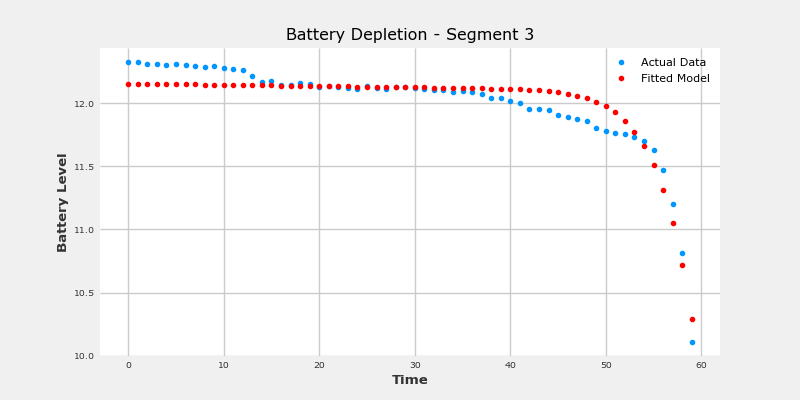

Processing segment 4 with custom solver...
✅ Fitted params: a=12.1595, b=17.1581, d=60.67, s=0.001000


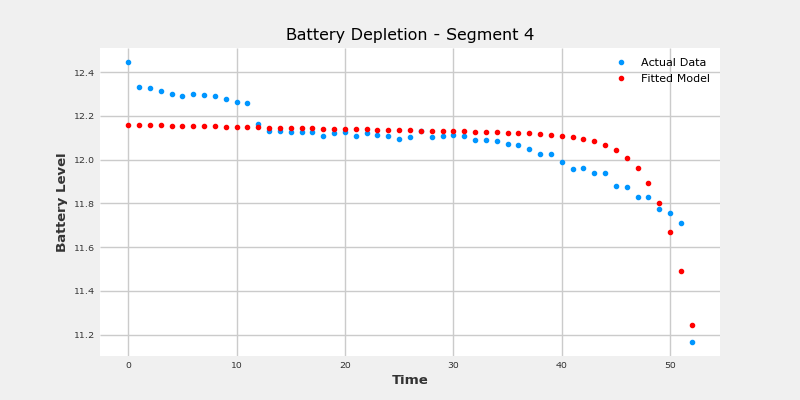

Processing segment 5 with custom solver...
✅ Fitted params: a=11.5614, b=16.9510, d=78.14, s=0.001000


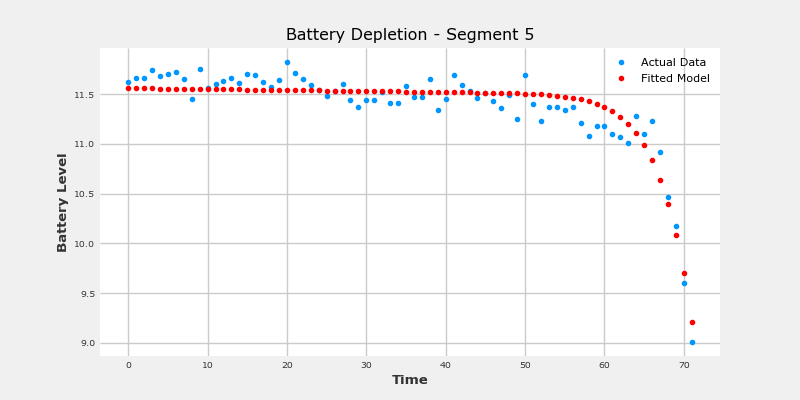

Processing segment 6 with custom solver...
✅ Fitted params: a=12.2295, b=16.0725, d=59.88, s=0.001000


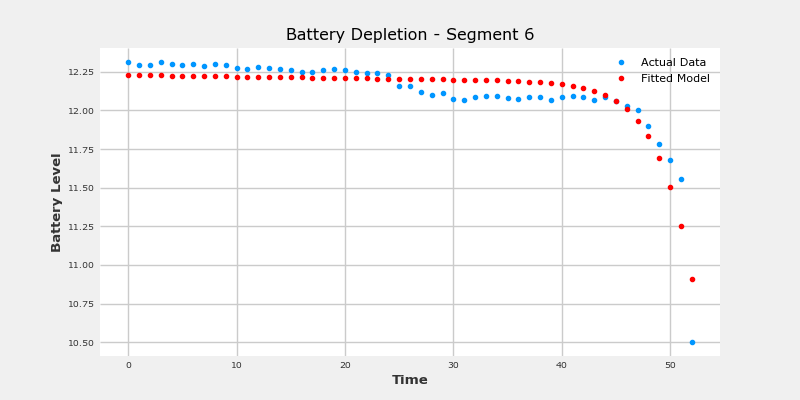

Processing segment 7 with custom solver...
✅ Fitted params: a=12.1447, b=18.2732, d=80.25, s=0.001000


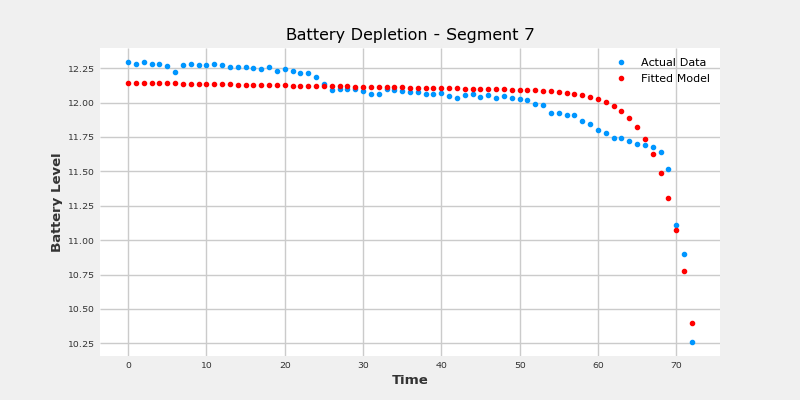

Processing segment 8 with custom solver...
✅ Fitted params: a=12.1479, b=15.9571, d=71.39, s=0.001000


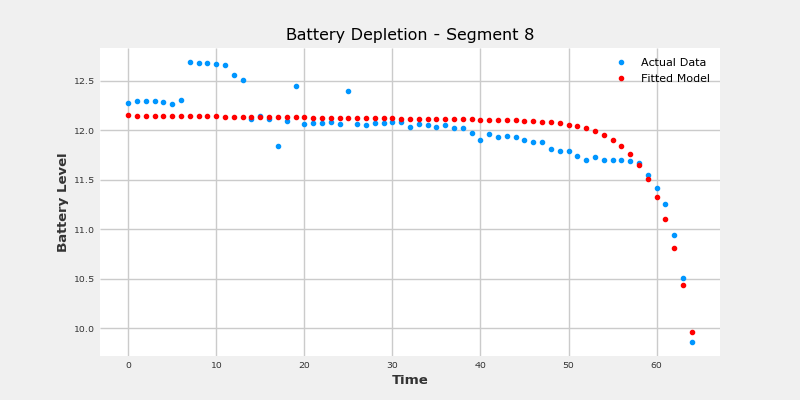

Processing segment 9 with custom solver...
✅ Fitted params: a=12.5281, b=18.9157, d=83.71, s=0.001000


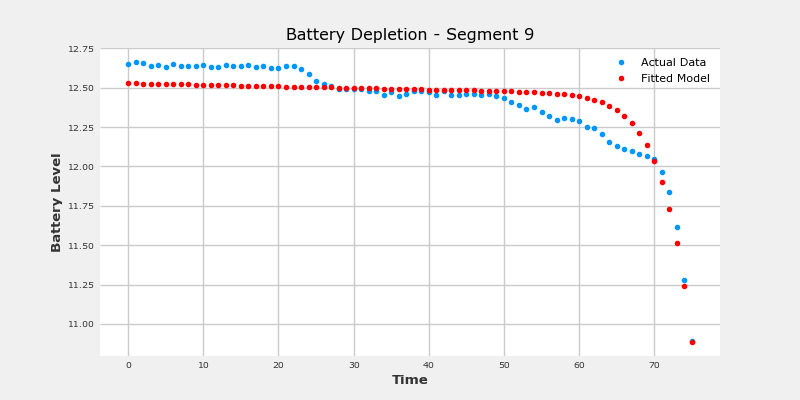

In [59]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Battery model
def battery_model(x, a, b, d, s):
    return (1 - (x / d)**b) * a - s * x

# Step 2: Derivative of battery model
def battery_model_derivative(x, a, b, d, s):
    return -a * b * (x / d)**(b - 1) / d - s

# Step 3: Loss function (MSE)
def loss(params, x, y_actual):
    a, b, d, s = params
    if d <= 0 or b <= 0 or a <= 0 or s < 0:
        return np.inf  # Reject bad values
    y_pred = battery_model(x, a, b, d, s)
    return np.mean((y_actual - y_pred) ** 2)

# Example: One segment
for segment_id, df in Austevoll_Sor_df_segments.items():
    print(f"Processing segment {segment_id} with custom solver...")

    numoy_array = df['System_Parameters.Input_Voltage'].to_numpy()
    x_data = np.arange(len(numoy_array))
    y_data = numoy_array

    # Initial guess
    initial_guess = [10, 2.5, len(x_data), 0.0005]

    # Optimization
    result = minimize(loss, initial_guess, args=(x_data, y_data),
                      bounds=[(1, 20), (0.5, 60), (len(x_data)/2, len(x_data)*2), (0, 0.001)],
                      method='L-BFGS-B')

    if result.success:
        a_opt, b_opt, d_opt, s_opt = result.x
        print(f"✅ Fitted params: a={a_opt:.4f}, b={b_opt:.4f}, d={d_opt:.2f}, s={s_opt:.6f}")

        # Evaluate model
        y_model = battery_model(x_data, a_opt, b_opt, d_opt, s_opt)
        dy_dx = battery_model_derivative(x_data, a_opt, b_opt, d_opt, s_opt)

        # Plot
        plt.figure(figsize=(8, 4))
        plt.plot(x_data, y_data, '.', label='Actual Data')
        #plt.plot(x_data, y_model, '-', label='Fitted Model', color='red')
        plt.plot(x_data, y_model, label='Fitted Model', color='red', marker='.', linestyle='None')
        plt.title(f'Battery Depletion - Segment {segment_id}')
        plt.xlabel('Time')
        plt.ylabel('Battery Level')
        plt.legend()
        plt.grid()
        plt.show()

    else:
        print(f"❌ Optimization failed for segment {segment_id}")


## adding smoothing column to df

In [60]:
def smooth_df_voltage_fun_df(df)->pd.DataFrame:
    
    copy_df = df.copy()
    
    def battery_model(x, a, b, d, s):
        return (1 - (x / d)**b) * a - s * x

    # Step 2: Derivative of battery model
    def battery_model_derivative(x, a, b, d, s):
        return -a * b * (x / d)**(b - 1) / d - s

    # Step 3: Loss function (MSE)
    def loss(params, x, y_actual):
        a, b, d, s = params
        if d <= 0 or b <= 0 or a <= 0 or s < 0:
            return np.inf  # Reject bad values
        y_pred = battery_model(x, a, b, d, s)
        return np.mean((y_actual - y_pred) ** 2)
    
    
    numoy_array = copy_df['System_Parameters.Input_Voltage'].to_numpy()
    x_data = np.arange(len(numoy_array))
    y_data = numoy_array
    
    # Initial guess
    initial_guess = [10, 2.5, len(x_data), 0.0005]
    
    # Optimization
    result = minimize(loss, initial_guess, args=(x_data, y_data),
                      bounds=[(1, 20), (0.5, 60), (len(x_data)/2, len(x_data)*2), (0, 0.001)],
                      method='L-BFGS-B')
    
    if result.success:
        a_opt, b_opt, d_opt, s_opt = result.x
        print(f"✅ Fitted params: a={a_opt:.4f}, b={b_opt:.4f}, d={d_opt:.2f}, s={s_opt:.6f}")

        # Evaluate model
        y_model = battery_model(x_data, a_opt, b_opt, d_opt, s_opt)
        dy_dx = battery_model_derivative(x_data, a_opt, b_opt, d_opt, s_opt)
        
        copy_df['Battery_Level_Fitted'] = y_model
        copy_df['Battery_Level_Derivative'] = dy_dx
    else:
        print(f"❌ Optimization failed for segment {segment_id}")
    return copy_df
    

In [61]:
seg_df = Austevoll_Sor_df_segments[6].copy()
seg_df = smooth_df_voltage_fun_df(seg_df)
seg_df.columns

✅ Fitted params: a=12.2295, b=16.0725, d=59.88, s=0.001000


Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'System_Parameters.Input_Voltage', 'Battery_Level_Fitted',
       'Battery_Level_Derivative', 'Voltage_Lag1', 'Voltage_Lead1',
       'Voltage_Diff', 'Voltage_Change_Rate', 'Rolling_Mean_Voltage',
       'Rolling_Max_Voltage', 'Rolling_Std_Voltage'],
      dtype='object')

Processing segment 3 with custom solver...
✅ Fitted params: a=12.1552, b=15.9170, d=66.51, s=0.001000


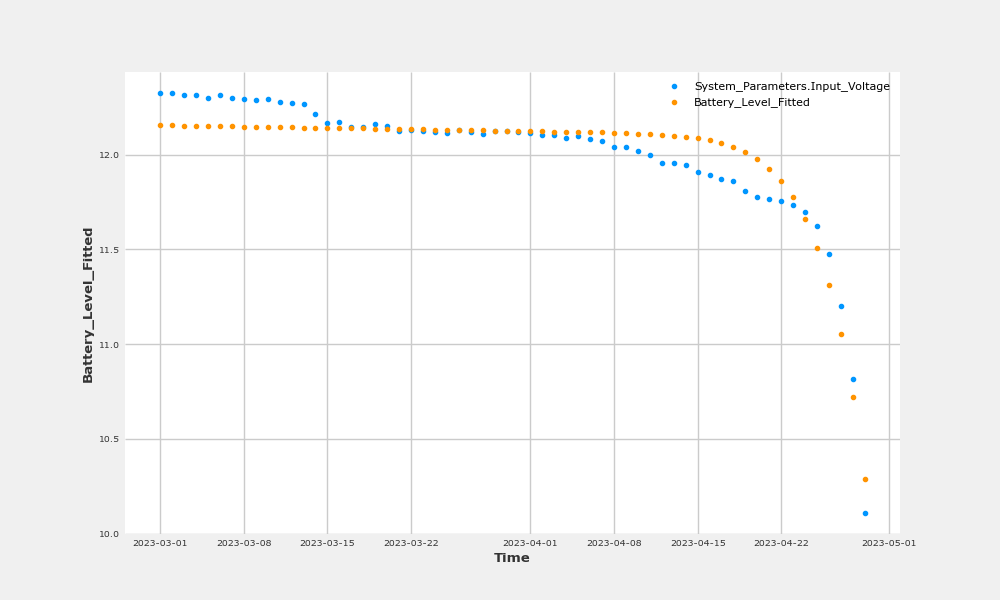

Processing segment 4 with custom solver...
✅ Fitted params: a=12.1595, b=17.1581, d=60.67, s=0.001000


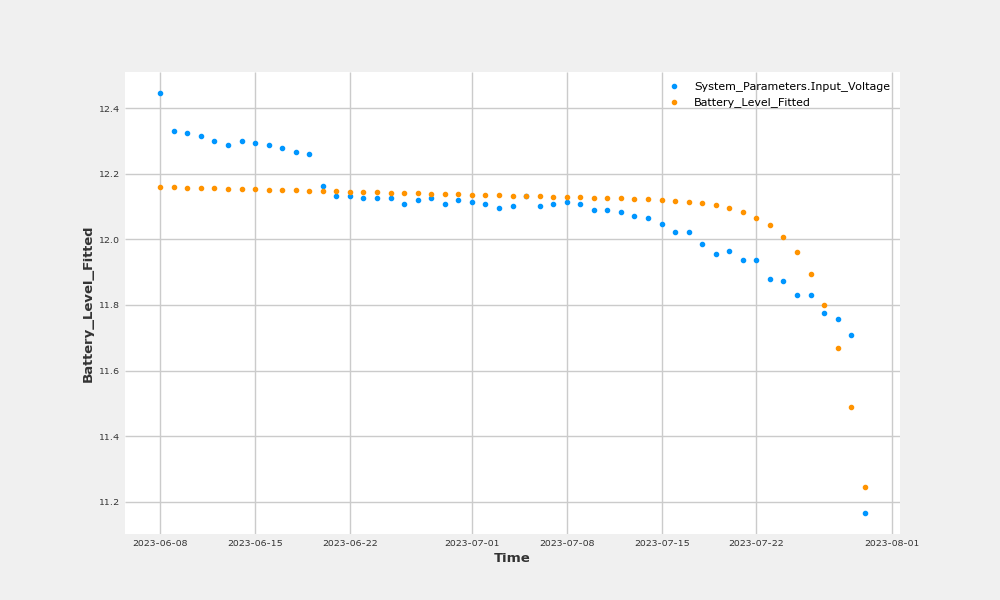

Processing segment 5 with custom solver...
✅ Fitted params: a=11.5614, b=16.9510, d=78.14, s=0.001000


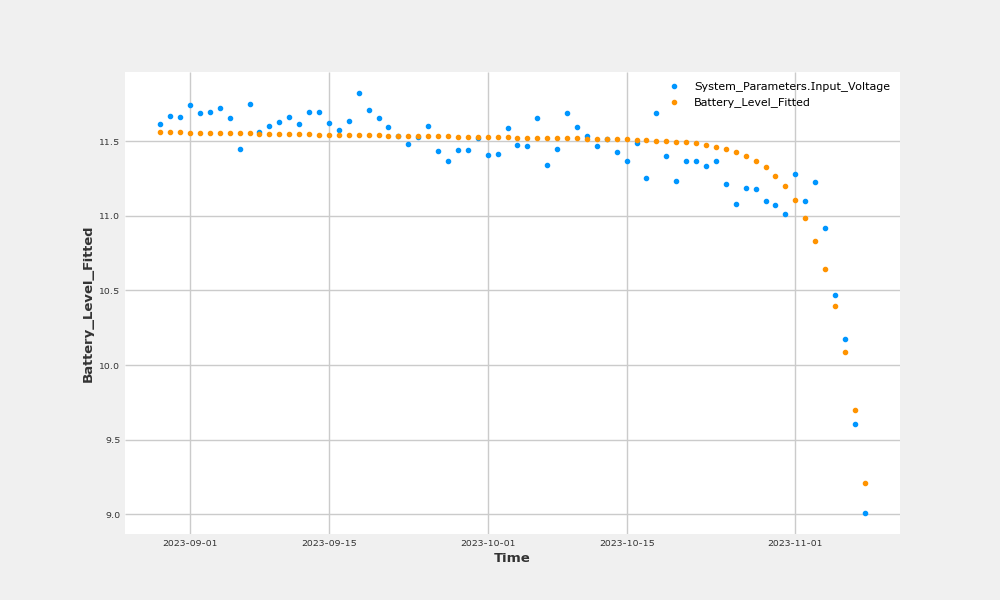

Processing segment 6 with custom solver...
✅ Fitted params: a=12.2295, b=16.0725, d=59.88, s=0.001000


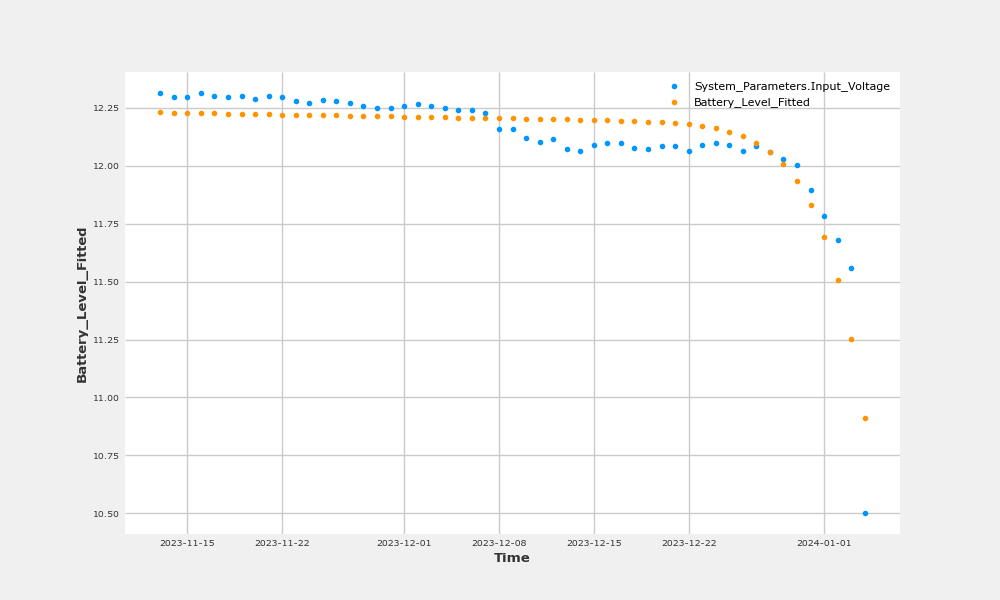

Processing segment 7 with custom solver...
✅ Fitted params: a=12.1447, b=18.2732, d=80.25, s=0.001000


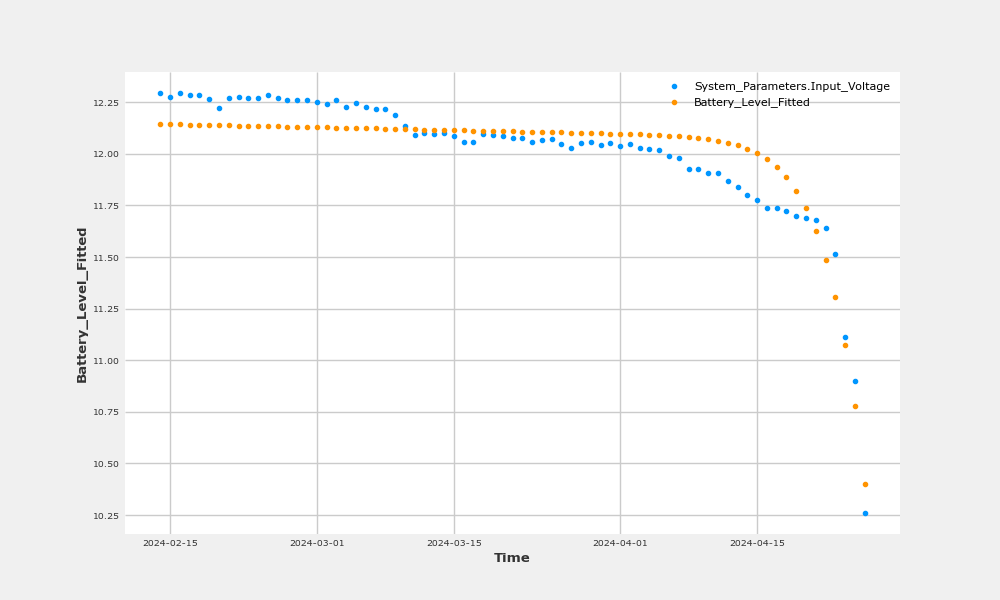

Processing segment 8 with custom solver...
✅ Fitted params: a=12.1479, b=15.9571, d=71.39, s=0.001000


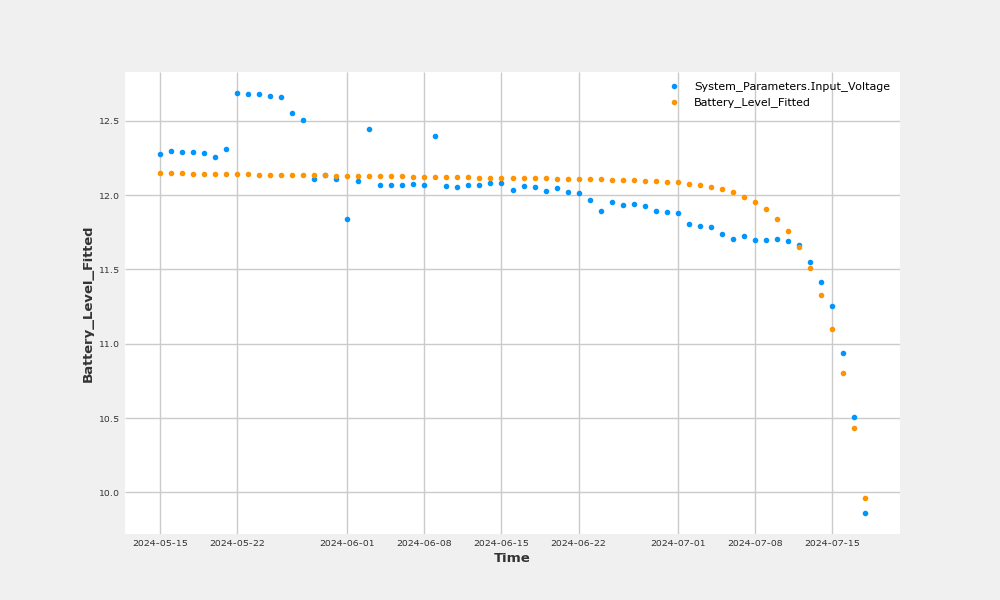

Processing segment 9 with custom solver...
✅ Fitted params: a=12.5281, b=18.9157, d=83.71, s=0.001000


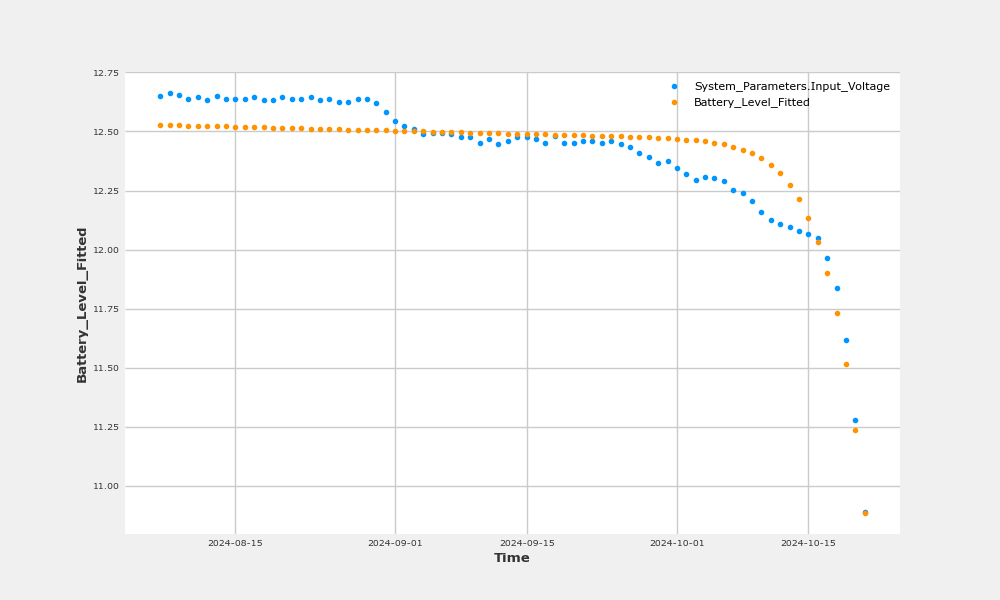

In [62]:
for segment_id, df in Austevoll_Sor_df_segments.items():
    print(f"Processing segment {segment_id} with custom solver...")
    seg_df = smooth_df_voltage_fun_df(df)
    plot_dfs([seg_df[['System_Parameters.Input_Voltage', 'Battery_Level_Fitted']]])
    Austevoll_Sor_df_segments[segment_id] = seg_df.copy()

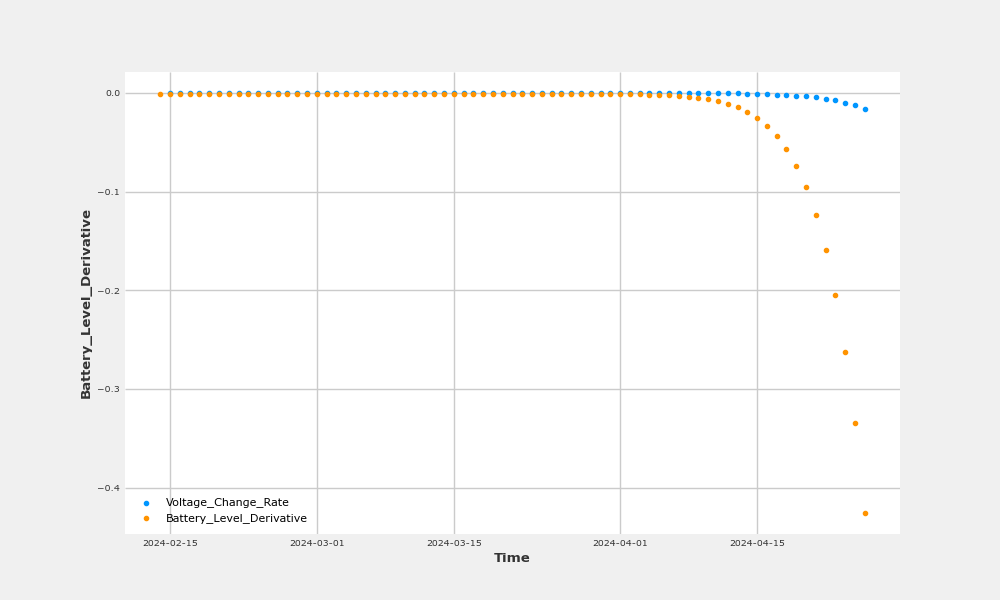

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'System_Parameters.Input_Voltage', 'Battery_Level_Fitted',
       'Battery_Level_Derivative', 'Voltage_Lag1', 'Voltage_Lead1',
       'Voltage_Diff', 'Voltage_Change_Rate', 'Rolling_Mean_Voltage',
       'Rolling_Max_Voltage', 'Rolling_Std_Voltage'],
      dtype='object')

In [63]:
seg_df = Austevoll_Sor_df_segments[7].copy()
plot_dfs([seg_df[['Voltage_Change_Rate','Battery_Level_Derivative']]])
seg_df.columns

In [64]:
features = ['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 
            
            'Time_Since_t0',
       'Time_Since_t0_n', 'Hours_Since_t0', 'Days_Since_t0', 'Weeks_Since_t0',
       'Months_Since_t0', 
       
       'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
       
       'Temperature',
       'Temperature_sum', 
       
       'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       
       #'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage', 'Voltage_Lag1', 'Voltage_Diff',
       'Voltage_Change_Rate', 'Rolling_Mean_Voltage', 'Rolling_Max_Voltage',
       'Rolling_Std_Voltage', 
       
       'Battery_Level_Fitted',
       'Battery_Level_Derivative']

In [65]:
seg_df[['System_Parameters.Input_Voltage','Battery_Level_Fitted', 'Voltage_Lag1', 'Voltage_Lead1']].head(10)

,System_Parameters.Input_Voltage,Battery_Level_Fitted,Voltage_Lag1,Voltage_Lead1
Time,,,,
2024-02-14,12.2947,12.144742,NaN,12.143742
2024-02-15,12.2769,12.143742,12.144742,12.142742
2024-02-16,12.2947,12.142742,12.143742,12.141742
2024-02-17,12.2828,12.141742,12.142742,12.140742
2024-02-18,12.2828,12.140742,12.141742,12.139742
2024-02-19,12.2650,12.139742,12.140742,12.138742
2024-02-20,12.2225,12.138742,12.139742,12.137742
2024-02-21,12.2710,12.137742,12.138742,12.136742
2024-02-22,12.2769,12.136742,12.137742,12.135742


# fin